In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

uploaded = files.upload()

Saving База.csv to База.csv


1. Загрузите данные из файла "База.csv"

In [ ]:
df = pd.read_csv('База.csv',
                      usecols=['УИД_Брони', 'ДатаБрони', 'ВремяБрони', 'ИсточникБрони', 'ВременнаяБронь', 'СледующийСтатус', 'Город',
                               'ВидПомещения', 'Тип', 'ПродаваемаяПлощадь', 'Этаж', 'СтоимостьНаДатуБрони', 'ТипСтоимости', 'ВариантОплаты',
                               'ВариантОплатыДоп', 'СкидкаНаКвартиру', 'ФактическаяСтоимостьПомещения', 'СделкаАН', 'ИнвестиционныйПродукт',
                               'Привилегия', 'Статус лида (из CRM)'],
                      delimiter=';',
                      encoding='windows-1251')
df

,УИД_Брони,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Город,ВидПомещения,Тип,ПродаваемаяПлощадь,...,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,ВариантОплатыДоп,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,СделкаАН,ИнвестиционныйПродукт,Привилегия,Статус лида (из CRM)
0,d192173f-fc14-11eb-9512-000c29ad50ac,13.08.2021,1:00:01,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к",72,...,4296100,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4296100,Нет,Нет,Нет,S
1,43574a1f-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:12:46,ручная,Да,Свободна,Ярославль,жилые помещения,"3,5к","79,8",...,5279600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5279600,Да,Нет,Нет,F
2,0e7b7a81-fe97-11eb-9512-000c29ad50ac,16.08.2021,5:37:12,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,S
3,c7041428-f90b-11eb-9512-000c29ad50ac,09.08.2021,4:17:35,ручная,Да,Свободна,Тюмень,жилые помещения,"2,5к","61,6",...,5414500,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5414500,Нет,Нет,Нет,S
4,60090518-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:13:35,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5514,945845a1-6269-11ec-951b-000c29ad50ac,21.12.2021,6:23:36,ручная,Нет,Свободна,Набережные Челны,жилые помещения,с,30,...,2373200,Стоимость при 100% оплате,Единовременная оплата,Ипотека,-94928,2468128,Нет,Нет,Нет,NaN
5515,4f131bfb-78f4-11ec-951d-000c29ad50ac,19.01.2022,10:52:06,ручная,Нет,NaN,Тюмень,кладовые,клад,"3,3",...,124700,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,124700,Нет,Нет,Нет,NaN
5516,74f0e184-78fc-11ec-951d-000c29ad50ac,19.01.2022,11:50:23,МП,Да,Свободна,Набережные Челны,жилые помещения,"1,5к","46,3",...,4499000,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,4499000,Нет,Нет,Нет,NaN
5517,12866ac0-7902-11ec-951d-000c29ad50ac,19.01.2022,12:30:40,МП,Нет,NaN,Пермь,жилые помещения,"2,5к","71,82",...,7422100,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,7422100,Да,Нет,Нет,NaN


2. Предварительная фильтрация.


a. Поскольку нас интересуют только сделки с жилой недвижимостью,
отфильтруйте данные, оставив только те, для которых «ВидПомещения» =
«жилые помещения». В дальнейшем этот столбец использоваться не будет,
его можно удалить (или удалите его из датасета вообще, или просто нигде
далее не рассматривайте).


In [ ]:
df = df[df['ВидПомещения']=='жилые помещения']
del df['ВидПомещения']

b. Также для нас бесполезны данные, по которым статус не определен.
Отфильтруйте данные по признаку «СледующийСтатус». В оставшихся
строчках замените значение «Продана» на 1, «Свободна» – на 0.

In [ ]:
df = df[df['СледующийСтатус'].notna() & (df['СледующийСтатус'] != 'В резерве')]
df['СледующийСтатус'] = df['СледующийСтатус'].map({'Продана': 1, 'Свободна': 0})
df

,УИД_Брони,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Город,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,ВариантОплатыДоп,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,СделкаАН,ИнвестиционныйПродукт,Привилегия,Статус лида (из CRM)
0,d192173f-fc14-11eb-9512-000c29ad50ac,13.08.2021,1:00:01,ручная,Да,0,Ярославль,"2,5к",72,3.0,4296100,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4296100,Нет,Нет,Нет,S
1,43574a1f-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:12:46,ручная,Да,0,Ярославль,"3,5к","79,8",2.0,5279600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5279600,Да,Нет,Нет,F
2,0e7b7a81-fe97-11eb-9512-000c29ad50ac,16.08.2021,5:37:12,ручная,Да,0,Ярославль,"2,5к","65,4",18.0,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,S
3,c7041428-f90b-11eb-9512-000c29ad50ac,09.08.2021,4:17:35,ручная,Да,0,Тюмень,"2,5к","61,6",12.0,5414500,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5414500,Нет,Нет,Нет,S
4,60090518-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:13:35,ручная,Да,0,Ярославль,"2,5к","65,4",18.0,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,5866fe67-543a-11ec-9518-000c29ad50ac,03.12.2021,5:10:13,МП,Нет,0,Набережные Челны,2к,"46,5",1.0,3494100,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,3494100,Нет,Нет,Нет,NaN
5512,30127467-6304-11ec-951b-000c29ad50ac,22.12.2021,12:50:18,МП,Да,0,Набережные Челны,3к,"86,3",10.0,7557600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,7557600,Нет,Нет,Нет,NaN
5514,945845a1-6269-11ec-951b-000c29ad50ac,21.12.2021,6:23:36,ручная,Нет,0,Набережные Челны,с,30,14.0,2373200,Стоимость при 100% оплате,Единовременная оплата,Ипотека,-94928,2468128,Нет,Нет,Нет,NaN
5516,74f0e184-78fc-11ec-951d-000c29ad50ac,19.01.2022,11:50:23,МП,Да,0,Набережные Челны,"1,5к","46,3",9.0,4499000,Стоимость при 100% оплате,Единовременная оплата,Ипотека,NaN,4499000,Нет,Нет,Нет,NaN


c. Не забывайте, что столбец «УИД_Брони» для нас также не представляет
интереса – удалите его из датасета вообще, или просто нигде далее не
рассматривайте.

In [ ]:
del df['УИД_Брони']

Дополнительно уберем дату и время брони, так как в заданиях не сказано об их преобразовании, а в дальнейшем нужно будет нормализовать данные, для чего нужны численные типы, значит, они составят нам дополнительные трудности от которых проще избавиться

In [ ]:
del df['ДатаБрони']
del df['ВремяБрони']

3. Проверьте тип данных и преобразуйте все данные к числовому типу

a. Для тех полей, которые по смыслу являются числовыми (например,
«ПродаваемаяПлощадь») – просто проверьте правильность типа

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   object 
 1   ВременнаяБронь                 3944 non-null   object 
 2   СледующийСтатус                3944 non-null   int64  
 3   Город                          3944 non-null   object 
 4   Тип                            3900 non-null   object 
 5   ПродаваемаяПлощадь             3900 non-null   object 
 6   Этаж                           3944 non-null   float64
 7   СтоимостьНаДатуБрони           3944 non-null   object 
 8   ТипСтоимости                   3944 non-null   object 
 9   ВариантОплаты                  3941 non-null   object 
 10  ВариантОплатыДоп               2218 non-null   object 
 11  СкидкаНаКвартиру               698 non-null    object 
 12  ФактическаяСтоимостьПомещения  3944 non-null   object

In [ ]:
df['ПродаваемаяПлощадь'] = df['ПродаваемаяПлощадь'].str.replace(',', '.').astype(float)
df['Этаж'] = df['Этаж'].astype(int)
df['СтоимостьНаДатуБрони'] = df['СтоимостьНаДатуБрони'].str.replace(',', '.').astype(float)
df['СкидкаНаКвартиру'] = df['СкидкаНаКвартиру'].str.replace(',', '.').astype(float)
df['ФактическаяСтоимостьПомещения'] = df['ФактическаяСтоимостьПомещения'].str.replace(',', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   object 
 1   ВременнаяБронь                 3944 non-null   object 
 2   СледующийСтатус                3944 non-null   int64  
 3   Город                          3944 non-null   object 
 4   Тип                            3900 non-null   object 
 5   ПродаваемаяПлощадь             3900 non-null   float64
 6   Этаж                           3944 non-null   int64  
 7   СтоимостьНаДатуБрони           3944 non-null   float64
 8   ТипСтоимости                   3944 non-null   object 
 9   ВариантОплаты                  3941 non-null   object 
 10  ВариантОплатыДоп               2218 non-null   object 
 11  СкидкаНаКвартиру               698 non-null    float64
 12  ФактическаяСтоимостьПомещения  3944 non-null   float6

b. Для бинарных признаков (например, «ИсточникБрони») выполните
кодирование (один вариант закодируйте 0, другой 1)

In [ ]:
df['ИсточникБрони'] = df['ИсточникБрони'].map({'ручная': 1, 'МП': 0})
df['ВременнаяБронь'] = df['ВременнаяБронь'].map({'Да': 1, 'Нет': 0})
df['ТипСтоимости'] = df['ТипСтоимости'].map({'Стоимость при 100% оплате': 1, 'Стоимость в рассрочку': 0})
df['ВариантОплаты'] = df['ВариантОплаты'].map({'Единовременная оплата': 1, 'Оплата в рассрочку': 0})
df['ВариантОплатыДоп'] = df['ВариантОплатыДоп'].map({'Ипотека': 1, 'Вторичное жилье': 0})
df['СделкаАН'] = df['СделкаАН'].map({'Да': 1, 'Нет': 0})
df['ИнвестиционныйПродукт'] = df['ИнвестиционныйПродукт'].map({'Да': 1, 'Нет': 0})
df['Привилегия'] = df['Привилегия'].map({'Да': 1, 'Нет': 0})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   СледующийСтатус                3944 non-null   int64  
 3   Город                          3944 non-null   object 
 4   Тип                            3900 non-null   object 
 5   ПродаваемаяПлощадь             3900 non-null   float64
 6   Этаж                           3944 non-null   int64  
 7   СтоимостьНаДатуБрони           3944 non-null   float64
 8   ТипСтоимости                   3944 non-null   int64  
 9   ВариантОплаты                  3941 non-null   float64
 10  ВариантОплатыДоп               2218 non-null   float64
 11  СкидкаНаКвартиру               698 non-null    float64
 12  ФактическаяСтоимостьПомещения  3944 non-null   float6

c. Для категориальных не бинарных признаков (например, «Город»)
выполните one-hot кодирование.

In [ ]:
df = pd.get_dummies(df,
                           columns=['Город', 'Статус лида (из CRM)'],
                           prefix=['Город', 'Статус_лида'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   СледующийСтатус                3944 non-null   int64  
 3   Тип                            3900 non-null   object 
 4   ПродаваемаяПлощадь             3900 non-null   float64
 5   Этаж                           3944 non-null   int64  
 6   СтоимостьНаДатуБрони           3944 non-null   float64
 7   ТипСтоимости                   3944 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   ВариантОплатыДоп               2218 non-null   float64
 10  СкидкаНаКвартиру               698 non-null    float64
 11  ФактическаяСтоимостьПомещения  3944 non-null   float64
 12  СделкаАН                       3944 non-null   int64 

d. Обратите внимание на поле «Тип». По смыслу оно числовое (количество
комнат), но напрямую сконвертировать его в числовой тип мешает буковка
«к» в конце. Напишите вручную преобразование, которое удаляет букву «к»
в конце и конвертирует то, что осталось, в число. Если это невозможно
(среди данных вам встретится еще вариант, когда в этом поле записано
просто «с») – просто пока оставьте поле пустым (NaN).


In [ ]:
def changeType(value):
    value_str = str(value).strip()

    if value_str.endswith('к'):
        value_str = value_str[:-1]

    if value_str.lower() == 'с':
        value_str = np.nan

    return value_str
df['Тип'] = df['Тип'].apply(changeType)
df['Тип'] = df['Тип'].str.replace(',', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   СледующийСтатус                3944 non-null   int64  
 3   Тип                            3741 non-null   float64
 4   ПродаваемаяПлощадь             3900 non-null   float64
 5   Этаж                           3944 non-null   int64  
 6   СтоимостьНаДатуБрони           3944 non-null   float64
 7   ТипСтоимости                   3944 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   ВариантОплатыДоп               2218 non-null   float64
 10  СкидкаНаКвартиру               698 non-null    float64
 11  ФактическаяСтоимостьПомещения  3944 non-null   float64
 12  СделкаАН                       3944 non-null   int64 

4. Проверьте, есть ли по каким-либо признакам отсутствующие данные

a. Отсутствующие данные в поле «СкидкаНаКвартиру» замените на 0 (это
значение по умолчанию – если поле не заполнено, то скидки, по всей
видимости, нет).

In [ ]:
df['СкидкаНаКвартиру'] = df['СкидкаНаКвартиру'].fillna(0)
df['СкидкаНаКвартиру']

,СкидкаНаКвартиру
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
5507,0.0
5512,0.0
5514,-94928.0
5516,0.0


b. Отсутствующие данные в полях «Тип» и «ПродаваемаяПлощадь» замените
на медианное значение, вычисленное по всему набору данных

In [ ]:
type_median = df['Тип'].median()
square_median = df['ПродаваемаяПлощадь'].median()
df['Тип'] = df['Тип'].fillna(type_median)
df['ПродаваемаяПлощадь'] = df['ПродаваемаяПлощадь'].fillna(square_median)

c. Что делать с полем «ВариантОплатыДоп» решите самостоятельно (можно,
как указано в описании, вместо пустых значений использовать значение из
поля «ВариантОплаты», но в таком случае обратите внимание, что признак
становится не бинарным; допустимо также совсем убрать этот столбец из
рассмотрения).

In [ ]:
del df['ВариантОплатыДоп']

d. По всем остальным полям примите решение самостоятельно. Если
отсутствующих данных не много, то удалите соответствующие строки.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   СледующийСтатус                3944 non-null   int64  
 3   Тип                            3944 non-null   float64
 4   ПродаваемаяПлощадь             3944 non-null   float64
 5   Этаж                           3944 non-null   int64  
 6   СтоимостьНаДатуБрони           3944 non-null   float64
 7   ТипСтоимости                   3944 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   СкидкаНаКвартиру               3944 non-null   float64
 10  ФактическаяСтоимостьПомещения  3944 non-null   float64
 11  СделкаАН                       3944 non-null   int64  
 12  ИнвестиционныйПродукт          3944 non-null   int64 

In [ ]:
df = df[df['ВариантОплаты'].notna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3941 entries, 0 to 5518
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3941 non-null   int64  
 1   ВременнаяБронь                 3941 non-null   int64  
 2   СледующийСтатус                3941 non-null   int64  
 3   Тип                            3941 non-null   float64
 4   ПродаваемаяПлощадь             3941 non-null   float64
 5   Этаж                           3941 non-null   int64  
 6   СтоимостьНаДатуБрони           3941 non-null   float64
 7   ТипСтоимости                   3941 non-null   int64  
 8   ВариантОплаты                  3941 non-null   float64
 9   СкидкаНаКвартиру               3941 non-null   float64
 10  ФактическаяСтоимостьПомещения  3941 non-null   float64
 11  СделкаАН                       3941 non-null   int64  
 12  ИнвестиционныйПродукт          3941 non-null   int64 

5. Дополнение данных.

a. Добавьте новый признак «Цена за квадратный метр». Он должен
вычисляться на основе значений признаков
«ФактическаяСтоимостьПомещения» и «ПродаваемаяПлощадь».

In [ ]:
df['Цена за квадратный метр'] = df['ФактическаяСтоимостьПомещения']/df['ПродаваемаяПлощадь']

b. Добавьте новый признак «Скидка в процентах», на основе значений
«ФактическаяСтоимостьПомещения» и «СкидкаНаКвартиру».

In [ ]:
df['Скидка в процентах'] = round((df['СкидкаНаКвартиру']/df['ФактическаяСтоимостьПомещения'])*100, 2)

In [ ]:
df[['Скидка в процентах', 'СкидкаНаКвартиру', 'ФактическаяСтоимостьПомещения']]

,Скидка в процентах,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения
0,0.00,0.0,4296100.0
1,0.00,0.0,5279600.0
2,0.00,0.0,4201400.0
3,0.00,0.0,5414500.0
4,0.00,0.0,4201400.0
...,...,...,...
5507,0.00,0.0,3494100.0
5512,0.00,0.0,7557600.0
5514,-3.85,-94928.0,2468128.0
5516,0.00,0.0,4499000.0


6. Выполните нормализацию. Можете самостоятельно выбрать способ
нормализации. «По умолчанию» предлагается выполнить минимаксную
нормализацию и привести все значения к диапазону [0;1], кроме признака
«СкидкаНаКвартиру» - его логичнее приводить к диапазону [-0,5; 0,5].

In [ ]:
to_normalize = [
    'Тип',
    'ПродаваемаяПлощадь',
    'Этаж',
    'СтоимостьНаДатуБрони',
    'ФактическаяСтоимостьПомещения',
    'Цена за квадратный метр'
]

scaler = MinMaxScaler()
df[to_normalize] = scaler.fit_transform(df[to_normalize])

scaler2 = MinMaxScaler(feature_range=(-0.5, 0.5))
df[['СкидкаНаКвартиру', 'Скидка в процентах']] = scaler2.fit_transform(df[['СкидкаНаКвартиру', 'Скидка в процентах']])

In [ ]:
df

,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,СкидкаНаКвартиру,...,Город_Тверь,Город_Тюмень,Город_Уфа,Город_Хабаровск,Город_Ярославль,Статус_лида_F,Статус_лида_P,Статус_лида_S,Цена за квадратный метр,Скидка в процентах
0,1,1,0,0.428571,0.397864,0.083333,0.104727,1,1.0,-0.114056,...,False,False,False,False,True,False,False,True,0.036272,-0.176983
1,1,1,0,0.714286,0.467290,0.041667,0.141803,1,1.0,-0.114056,...,False,False,False,False,True,True,False,False,0.051763,-0.176983
2,1,1,0,0.428571,0.339119,0.708333,0.101157,1,1.0,-0.114056,...,False,False,False,False,True,False,False,True,0.047185,-0.176983
3,1,1,0,0.428571,0.305296,0.458333,0.146888,1,1.0,-0.114056,...,False,True,False,False,False,False,False,True,0.103632,-0.176983
4,1,1,0,0.428571,0.339119,0.708333,0.101157,1,1.0,-0.114056,...,False,False,False,False,True,False,True,False,0.047185,-0.176983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,0,0,0,0.285714,0.170895,0.000000,0.074494,1,1.0,-0.114056,...,False,False,False,False,False,False,False,False,0.073195,-0.176983
5512,0,1,0,0.571429,0.525145,0.375000,0.227677,1,1.0,-0.114056,...,False,False,False,False,False,False,False,False,0.102858,-0.176983
5514,1,0,0,0.285714,0.024032,0.541667,0.032239,1,1.0,-0.157729,...,False,False,False,False,False,False,False,False,0.090205,-0.344813
5516,0,1,0,0.142857,0.169114,0.333333,0.112376,1,1.0,-0.114056,...,False,False,False,False,False,False,False,False,0.125758,-0.176983


7. Проверьте датасет на сбалансированность (количество строк со значением
целевого признака 0 и со значением 1). Является ли датасет сбалансированным?

In [ ]:
class_counts = df['СледующийСтатус'].value_counts()
print("Распределение классов:")
print(class_counts)
print()
print(f"Процент класса 0 (Свободна): {class_counts[0] / len(df) * 100:.2f}%")
print(f"Процент класса 1 (Продана): {class_counts[1] / len(df) * 100:.2f}%")

Распределение классов:
СледующийСтатус
0    2804
1    1137
Name: count, dtype: int64

Процент класса 0 (Свободна): 71.15%
Процент класса 1 (Продана): 28.85%


Датасет является умеренно несбалансированным. Распределение классов: 71.15% — класс 0 (бронь отменена), 28.85% — класс 1 (бронь привела к продаже). Соотношение близкое к 70/30  может повлиять на метрики классификации: модель может смещаться в сторону предсказания более частого класса 0.

8. Сформируйте список факторных признаков и целевой признак.

In [ ]:
y = df['СледующийСтатус'] # Целевой признак

feature_columns = [col for col in df.columns if col != 'СледующийСтатус'] # Факторные признаки
X = df[feature_columns]

print(y)

0       0
1       0
2       0
3       0
4       0
       ..
5507    0
5512    0
5514    0
5516    0
5518    0
Name: СледующийСтатус, Length: 3941, dtype: int64


9. Выполните разбиение датасета на обучающую и тестовую выборки. При
формировании обучающей и тестовой выборок строки из исходного датафрейма
должны выбираться в случайном порядке.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=23)

10. Из библиотеки sklearn.neighbors возьмите алгоритм классификации KNN
(KNeighborsClassifier). Постройте (обучите) модель. Для параметров используйте
значения по умолчанию.

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

11. Из библиотеки sklearn.tree возьмите алгоритм классификации на основе деревьев
решений (DecisionTreeClassifier). Постройте (обучите) модель. Для параметров
используйте значения по умолчанию.


In [ ]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train, y_train)

DecisionTreeClassifier()

12. Получите векторы прогнозных значений целевой переменной на обучающей и на
тестовой выборках для каждой из моделей.


In [ ]:
y_pred_KNN = model_KNN.predict(X_test)
y_pred_Tree = model_Tree.predict(X_test)

13. Посчитайте показатели качества: «F-мера», точность (Precision) и полнота (Recall)
на обучающей и на тестовой выборках для каждой из моделей.

In [ ]:
print("F-мера kNN: " + str(round(f1_score(y_test, y_pred_KNN), 2)))
print("F-мера Tree: " + str(round(f1_score(y_test, y_pred_Tree), 2)))
print("\nPrecision kNN: " + str(round(precision_score(y_test, y_pred_KNN), 2)))
print("Precision Tree: " + str(round(precision_score(y_test, y_pred_Tree), 2)))
print("\nRecall kNN: " + str(round(recall_score(y_test, y_pred_KNN), 2)))
print("Recall Tree: " + str(round(recall_score(y_test, y_pred_Tree), 2)))

F-мера kNN: 0.74
F-мера Tree: 0.76

Precision kNN: 0.81
Precision Tree: 0.77

Recall kNN: 0.69
Recall Tree: 0.75


14. Сделайте вывод о том, насколько хорошо удалось решить задачу
прогнозирования. Какая модель оказалась лучше? Дайте интерпретацию
полученных значений Precision и Recall.


"Обе модели показали хорошее качество на не сильно сбалансированных данных. Decision Tree имеет более высокие F1-меру (0.76) и Recall (0.74), что означает лучшее обнаружение реальных продаж. KNN демонстрирует более высокий Precision (0.81), то есть меньше ложных предсказаний продаж.

Для задачи прогнозирования продаж недвижимости, где важно не упускать потенциальных клиентов, предпочтительнее Decision Tree с Recall=0.74, так как он находит на 5% больше реальных продаж по сравнению с KNN.

15. (1 балл) Постройте boxplot («ящик с усами») для всех числовых признаков.
Отфильтруйте исходные данные, удалив выбросы. Пересоздайте тестовую и
обучающую выборки, переобучите модели. Посчитайте показатели качества. Как
они изменились?


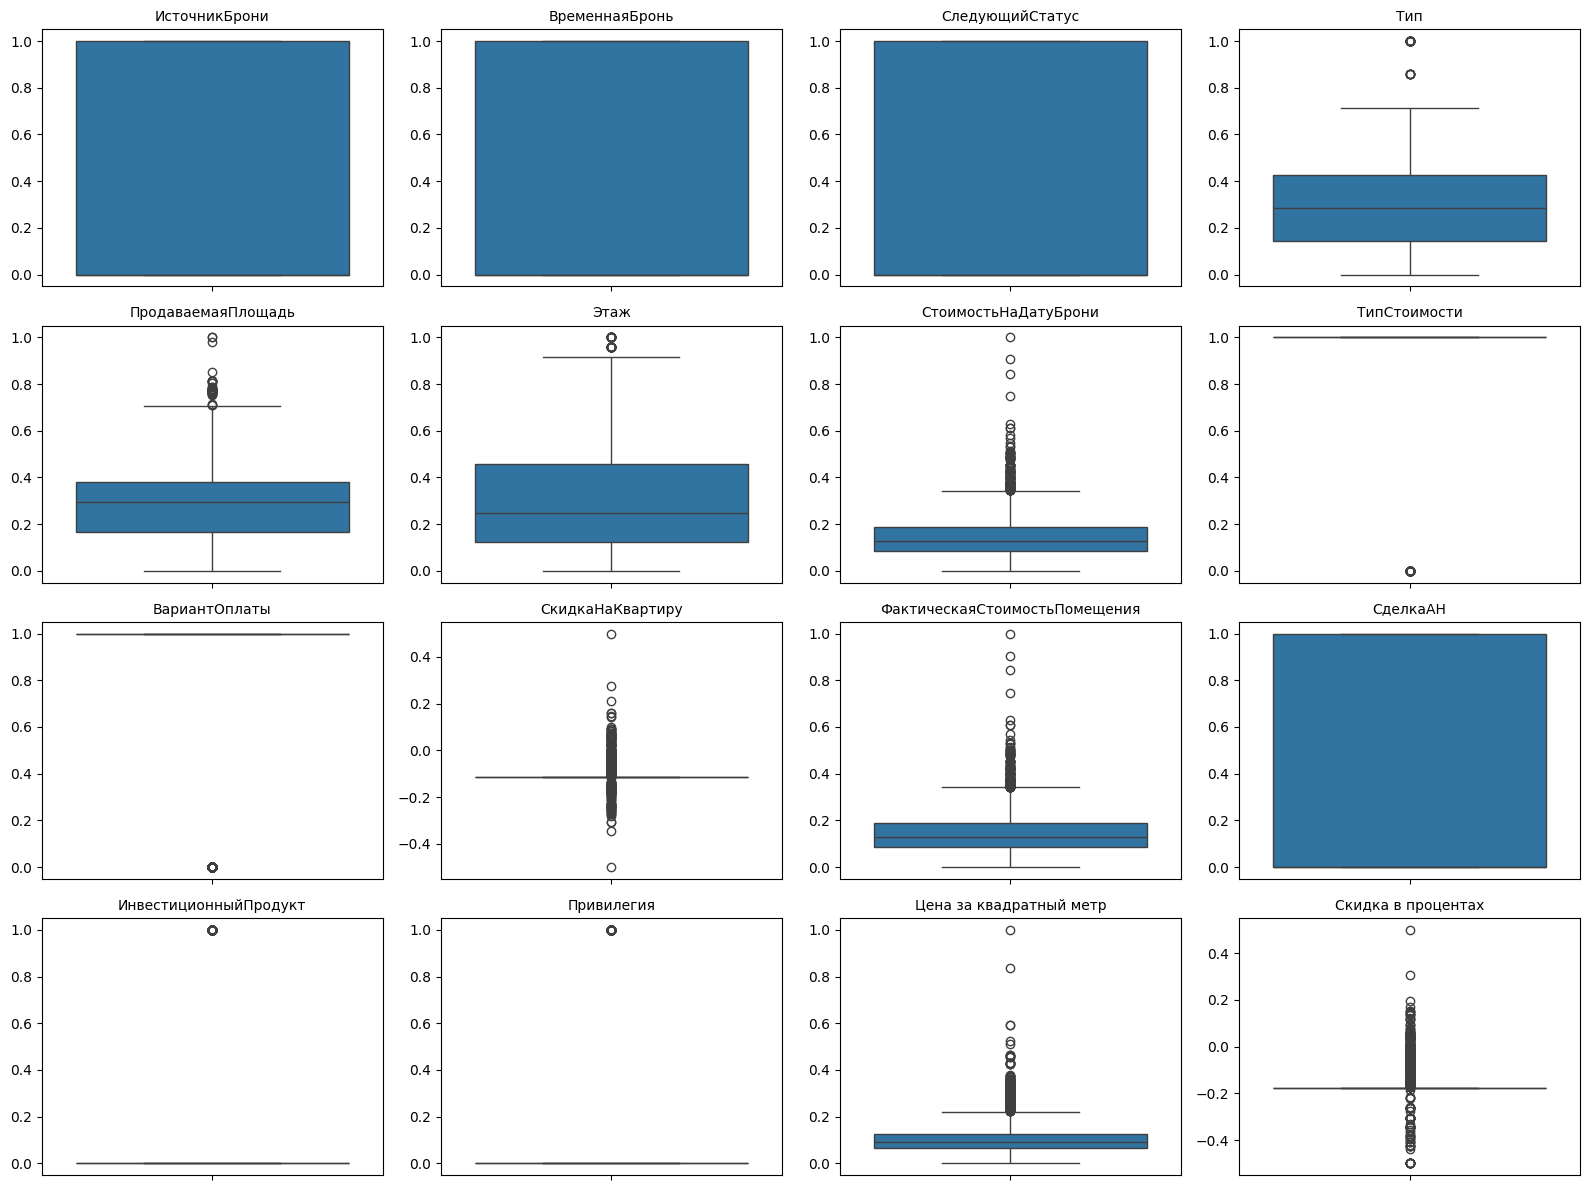

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
df_filtered = df.copy()

for col in numeric_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

print(f"Исходный размер: {len(df)}")
print(f"После фильтрации: {len(df_filtered)}")

Исходный размер: 3941
После фильтрации: 2623


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2623 entries, 0 to 5518
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  2623 non-null   int64  
 1   ВременнаяБронь                 2623 non-null   int64  
 2   СледующийСтатус                2623 non-null   int64  
 3   Тип                            2623 non-null   float64
 4   ПродаваемаяПлощадь             2623 non-null   float64
 5   Этаж                           2623 non-null   float64
 6   СтоимостьНаДатуБрони           2623 non-null   float64
 7   ТипСтоимости                   2623 non-null   int64  
 8   ВариантОплаты                  2623 non-null   float64
 9   СкидкаНаКвартиру               2623 non-null   float64
 10  ФактическаяСтоимостьПомещения  2623 non-null   float64
 11  СделкаАН                       2623 non-null   int64  
 12  ИнвестиционныйПродукт          2623 non-null   int64 

In [ ]:
X_filtered = df_filtered[feature_columns]
y_filtered = df_filtered['СледующийСтатус']

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=23, stratify=y_filtered
)

knn_filtered = KNeighborsClassifier()
knn_filtered.fit(X_train_filtered, y_train_filtered)

tree_filtered = DecisionTreeClassifier(random_state=23)
tree_filtered.fit(X_train_filtered, y_train_filtered)

y_pred_knn_filtered = knn_filtered.predict(X_test_filtered)
y_pred_tree_filtered = tree_filtered.predict(X_test_filtered)

print("F-мера kNN (после удаления выбросов): " + str(round(f1_score(y_test_filtered, y_pred_knn_filtered), 2)))
print("F-мера Tree (после удаления выбросов): " + str(round(f1_score(y_test_filtered, y_pred_tree_filtered), 2)))
print("\nPrecision kNN (после удаления выбросов): " + str(round(precision_score(y_test_filtered, y_pred_knn_filtered), 2)))
print("Precision Tree (после удаления выбросов): " + str(round(precision_score(y_test_filtered, y_pred_tree_filtered), 2)))
print("\nRecall kNN (после удаления выбросов): " + str(round(recall_score(y_test_filtered, y_pred_knn_filtered), 2)))
print("Recall Tree (после удаления выбросов): " + str(round(recall_score(y_test_filtered, y_pred_tree_filtered), 2)))

F-мера kNN (после удаления выбросов): 0.25
F-мера Tree (после удаления выбросов): 0.31

Precision kNN (после удаления выбросов): 0.39
Precision Tree (после удаления выбросов): 0.31

Recall kNN (после удаления выбросов): 0.19
Recall Tree (после удаления выбросов): 0.31


Удаление выбросов привело к существенному ухудшению предсказываения модели, вероятно, произошло нарушение балансировки. Попробуем это проверить

In [ ]:
print("\nБалансировка после удаления выбросов:")
balance_after = df_filtered['СледующийСтатус'].value_counts(normalize=True)
print(f"Процент класса 0 (отмена): {balance_after[0]*100:.2f}%")
print(f"Процент класса 1 (продажа): {balance_after[1]*100:.2f}%")


Балансировка после удаления выбросов:
Процент класса 0 (отмена): 90.93%
Процент класса 1 (продажа): 9.07%


Да, похоже мы удалили критическое количество данных о продажах, из-за чего модель стала горадо хуже предсказывать, значит, выбросы содержали важные данные, которые лучше не отбрасывать

16. (2 балла) Выполните подбор параметров для алгоритмов KNN и деревьев
решений. Для KNN попробуйте изменять параметр k – количество соседей, для
деревьев решений – глубину дерева. Постройте графики зависимости показателей
качества от значения параметра (от k в случае KNN и от глубины дерева в случае
деревьев решений). Для параметра k рассматривайте диапазон от 1 до 40. Для
глубины дерева – от 2 до 40. По графикам определите оптимальные значения
параметров

In [ ]:
f1_scores_knn = []
precision_scores_knn = []
recall_scores_knn = []
f1_scores_tree = []
precision_scores_tree = []
recall_scores_tree = []

for k in range(1, 41):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    f1_scores_knn.append(f1)
    precision_scores_knn.append(precision)
    recall_scores_knn.append(recall)

best_k_idx = np.argmax(f1_scores_knn)
best_k = 1 + best_k_idx
best_f1 = f1_scores_knn[best_k_idx]


for depth in range(2, 41):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=23)
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    f1_scores_tree.append(f1)
    precision_scores_tree.append(precision)
    recall_scores_tree.append(recall)

best_depth_idx = np.argmax(f1_scores_tree)
best_depth = 2 + best_depth_idx
best_f1_tree = f1_scores_tree[best_depth_idx]

([<matplotlib.axis.XTick at 0x7cb36015c710>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36')])

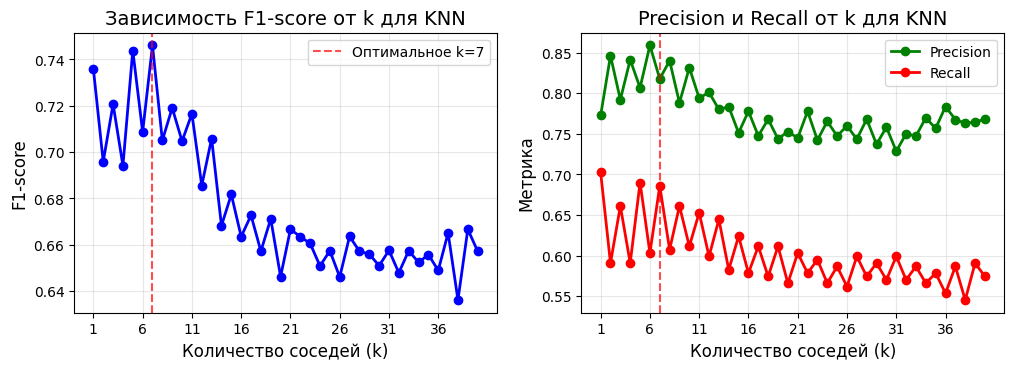

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, 41), f1_scores_knn, 'b-o', linewidth=2, markersize=6)
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.7, label=f'Оптимальное k={best_k}')
plt.xlabel('Количество соседей (k)', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('Зависимость F1-score от k для KNN', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(1, 41, 5))

plt.subplot(2, 2, 2)
plt.plot(range(1, 41), precision_scores_knn, 'g-o', label='Precision', linewidth=2, markersize=6)
plt.plot(range(1, 41), recall_scores_knn, 'r-o', label='Recall', linewidth=2, markersize=6)
plt.axvline(x=best_k, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Количество соседей (k)', fontsize=12)
plt.ylabel('Метрика', fontsize=12)
plt.title('Precision и Recall от k для KNN', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(1, 41, 5))

([<matplotlib.axis.XTick at 0x7cb360fcba10>,
 [Text(2, 0, '2'),
  Text(7, 0, '7'),
  Text(12, 0, '12'),
  Text(17, 0, '17'),
  Text(22, 0, '22'),
  Text(27, 0, '27'),
  Text(32, 0, '32'),
  Text(37, 0, '37')])

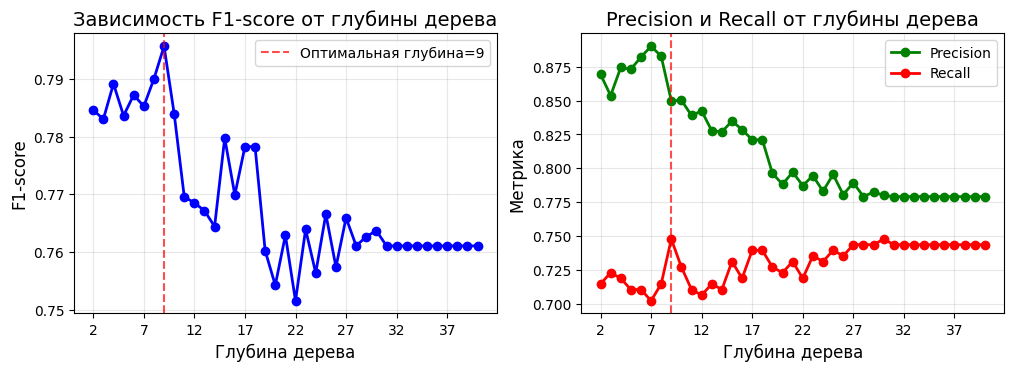

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(2, 41), f1_scores_tree, 'b-o', linewidth=2, markersize=6)
plt.axvline(x=best_depth, color='r', linestyle='--', alpha=0.7, label=f'Оптимальная глубина={best_depth}')
plt.xlabel('Глубина дерева', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('Зависимость F1-score от глубины дерева', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(2, 41, 5))

plt.subplot(2, 2, 2)
plt.plot(range(2, 41), precision_scores_tree, 'g-o', label='Precision', linewidth=2, markersize=6)
plt.plot(range(2, 41), recall_scores_tree, 'r-o', label='Recall', linewidth=2, markersize=6)
plt.axvline(x=best_depth, color='r', linestyle='--', alpha=0.7)
plt.xlabel('Глубина дерева', fontsize=12)
plt.ylabel('Метрика', fontsize=12)
plt.title('Precision и Recall от глубины дерева', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(range(2, 41, 5))

17. (1 балл) Из библиотеки sklearn.linear_model возьмите алгоритм логистической
регрессии (LogisticRegression). Постройте (обучите) модель. Посчитайте
показатели качества. Сравните результат с другими моделями.

In [ ]:
model_Logistic = LogisticRegression()
model_Logistic.fit(X_train, y_train)

y_pred_Logistic = model_Logistic.predict(X_test)

print("F-мера Logistic: " + str(round(f1_score(y_test, y_pred_Logistic), 2)))
print("Precision Logistic: " + str(round(precision_score(y_test, y_pred_Logistic), 2)))
print("Recall Logistic: " + str(round(recall_score(y_test, y_pred_Logistic), 2)))

F-мера Logistic: 0.73
Precision Logistic: 0.86
Recall Logistic: 0.63


Сравнение с kNN и деревом решений показывает, улучшение точности Precision, но ухудшение остальных показателей качества, а так как F-мера более общий показатель и полнота Recall значительно снизилась, дерево решений пока остается наилучшим вариантом.

18. (1 балл) Из библиотеки sklearn.svm возьмите алгоритм SVM (машины опорных
векторов) (LinearSVC). Постройте (обучите) модель. Посчитайте показатели
качества. Сравните результат с другими моделями.

In [ ]:
model_SVM = LinearSVC()
model_SVM.fit(X_train, y_train)

y_pred_SVM = model_SVM.predict(X_test)

print("F-мера SVM: " + str(round(f1_score(y_test, y_pred_SVM), 2)))
print("Precision SVM: " + str(round(precision_score(y_test, y_pred_SVM), 2)))
print("Recall SVM: " + str(round(recall_score(y_test, y_pred_SVM), 2)))

F-мера SVM: 0.77
Precision SVM: 0.87
Recall SVM: 0.68


Сравнение четырёх алгоритмов классификации показало, что SVM (LinearSVC) демонстрирует наилучшее качество с F1-мерой 0.77. Модель сочетает высокую точность предсказаний (Precision=0.87) с приемлемой полнотой охвата реальных продаж (Recall=0.68).